In [4]:
from model import FaceRec
from sklearn.datasets import fetch_lfw_people
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [1]:
CKPT_LOCATION = '/home/anshuman/Downloads/checkpoints/c1s_9_c2n_64_rs_1_c2s_6_c2d_0.7_lr_0.0001_c2vl_32_c1n_256_c1vl_16_c1s_5_c1nf_16--FaceRec--1522700434.769402'

In [5]:
model = FaceRec("FaceRec", output_folder='/tmp')
model.load(CKPT_LOCATION)

ModelBase::Loading ckpt ...


'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


The saved meta_graph is possibly from an older release:
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


INFO:tensorflow:Restoring parameters from /home/anshuman/Downloads/checkpoints/c1s_9_c2n_64_rs_1_c2s_6_c2d_0.7_lr_0.0001_c2vl_32_c1n_256_c1vl_16_c1s_5_c1nf_16--FaceRec--1522700434.769402


Restoring parameters from /home/anshuman/Downloads/checkpoints/c1s_9_c2n_64_rs_1_c2s_6_c2d_0.7_lr_0.0001_c2vl_32_c1n_256_c1vl_16_c1s_5_c1nf_16--FaceRec--1522700434.769402
ModelBase::Trying to load tensor params with str method
ModelBase::Ckpt ready


Type is unsupported, or the types of the items don't match field type in CollectionDef.
'Tensor' object has no attribute 'to_proto'


Error encountered when serializing model_variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'Tensor' object has no attribute 'to_proto'


In [6]:
people = fetch_lfw_people(color=True, min_faces_per_person=25)

In [39]:
def downsample_images(img):
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = img.resize((32,32), Image.ANTIALIAS)
    return np.array(img)

def rotate_images(img, degree=180):
    img = img * 255
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = img.rotate(degree)
    return np.array(img)/255

X_faces = people.images
Y_faces = people.target
target_names = people.target_names

X_faces = np.array([downsample_images(ab) for ab in X_faces])
X_faces = X_faces / 255
X_faces_rotated = np.array([rotate_images(ab) for ab in X_faces])

In [8]:
def get_top_5_prediction(image):
    softmax = model.predict(np.array([image]))
    top_5 = softmax.argsort()[0][-5:][::-1]
    top_5_names = [(target_names[i], softmax[0][i]) for i in top_5]
    return top_5_names

def print_top_5_prediction(image):
    top_5_names = get_top_5_prediction(image)
    print("\nPredicted Names and softmax score: ")
    for name in top_5_names:
        print("%s: %s" %(name[0], name[1]))

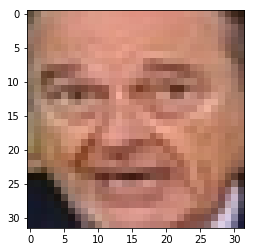

In [35]:
index = 1554
image = X_faces[index]
plt.imshow(image)

In [36]:
get_top_5_prediction(image)

[('Jacques Chirac', 0.041103154),
 ('Hans Blix', 0.025889402),
 ('Luiz Inacio Lula da Silva', 0.025523227),
 ('Tony Blair', 0.024971046),
 ('Arnold Schwarzenegger', 0.024817653)]

In [37]:
target_names[Y_faces[index]]

'Jacques Chirac'

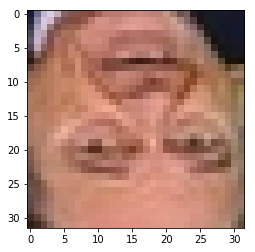

In [38]:
image_rotated = rotate_images(image)
plt.imshow(image_rotated)

In [40]:
from data_handler import get_face_data

In [44]:
x_train, y_train, x_test, y_test = get_face_data()
x_rotated_test = np.array([rotate_images(ab) for ab in x_test])

In [46]:
loss, acc, _ = model.evaluate_dataset(x_rotated_test, y_test)

In [47]:
print("Rotated Test dataset (180), loss = %s, acc = %s" % (loss, acc))

Rotated Test dataset (180), loss = 0.79608923, acc = 0.08235294117647059
